In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('data/Data_for_Values_1.csv')
df

,Country,Age,Salary,Purchased
0,France,44,72000,No
1,Spain,27,48000,Yes
2,Germany,30,54000,No
3,Spain,38,61000,No
4,Germany,40,20000,Yes
5,France,35,58000,Yes
6,Spain,38,52000,No
7,France,48,79000,Yes
8,Germany,50,83000,No
9,France,37,67000,Yes


In [5]:
df_new = df[['Age', 'Salary']]
df_new

,Age,Salary
0,44,72000
1,27,48000
2,30,54000
3,38,61000
4,40,20000
5,35,58000
6,38,52000
7,48,79000
8,50,83000
9,37,67000


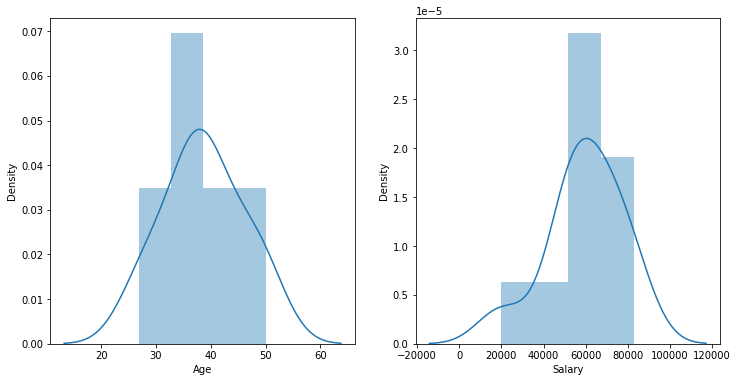

In [6]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df_new['Age'])
plt.subplot(1,2,2)
sns.distplot(df_new['Salary'])
plt.show()

In [7]:
# không phải là phân phối chuẩn -> không sử dụng StandardScaler

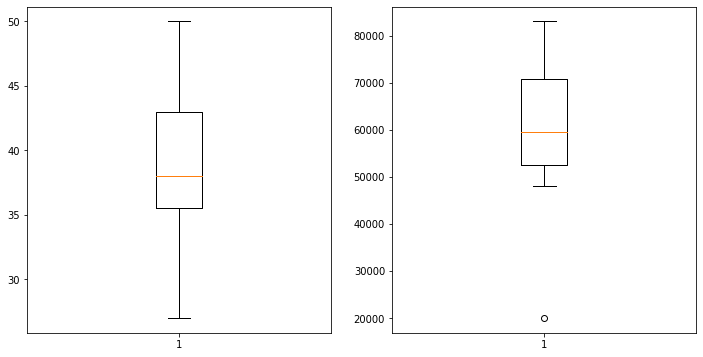

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.boxplot(df_new['Age'])
plt.subplot(1,2,2)
plt.boxplot(df_new['Salary'])
plt.show()

In [9]:
# có oulier -> không sử dụng MinMaxScaler
# --> sử dụng RobustScaler

In [10]:
from sklearn.preprocessing import RobustScaler

In [11]:
scaler = RobustScaler()

In [13]:
df_scale = scaler.fit_transform(df_new)
df_scale

array([[ 0.8       ,  0.68493151],
       [-1.46666667, -0.63013699],
       [-1.06666667, -0.30136986],
       [ 0.        ,  0.08219178],
       [ 0.26666667, -2.16438356],
       [-0.4       , -0.08219178],
       [ 0.        , -0.4109589 ],
       [ 1.33333333,  1.06849315],
       [ 1.6       ,  1.28767123],
       [-0.13333333,  0.4109589 ]])

In [14]:
df_scale = pd.DataFrame(df_scale, columns = df_new.columns)
df_scale

,Age,Salary
0,0.800000,0.684932
1,-1.466667,-0.630137
2,-1.066667,-0.301370
3,0.000000,0.082192
4,0.266667,-2.164384
5,-0.400000,-0.082192
6,0.000000,-0.410959
7,1.333333,1.068493
8,1.600000,1.287671
9,-0.133333,0.410959


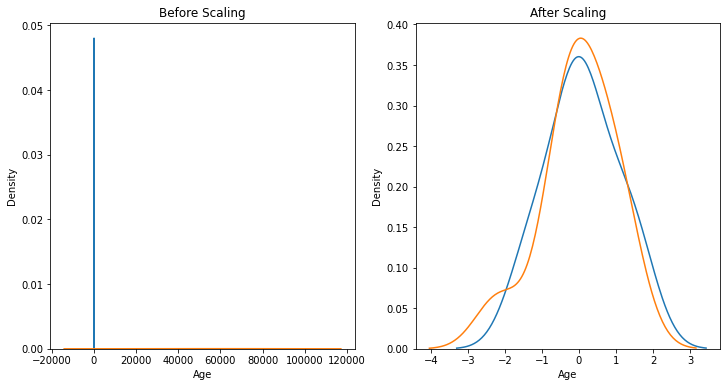

In [15]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.kdeplot(df_new['Age'], ax=ax1)
sns.kdeplot(df_new['Salary'], ax=ax1)
ax1.set_title('Before Scaling')

sns.kdeplot(df_scale['Age'], ax=ax2)
sns.kdeplot(df_scale['Salary'], ax=ax2)
ax2.set_title('After Scaling')
plt.show()

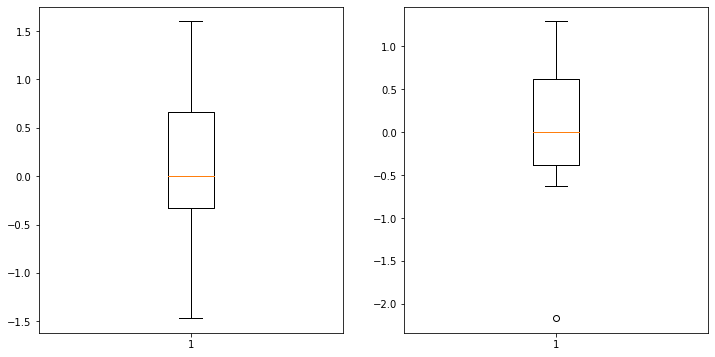

In [16]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.boxplot(df_scale['Age'])
plt.subplot(1,2,2)
plt.boxplot(df_scale['Salary'])
plt.show()

In [17]:
print('Before Scaling')
df_new.corr()

Before Scaling


,Age,Salary
Age,1.000000,0.544181
Salary,0.544181,1.000000


In [18]:
print('After Scaling')
df_scale.corr()

After Scaling


,Age,Salary
Age,1.000000,0.544181
Salary,0.544181,1.000000
